In [54]:

import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("happyscore_income.csv")
df.tail()

Saving happyscore_income.csv to happyscore_income (2).csv


,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
106,Uruguay,58.0,7.0,2.13,7544.40,5269.226667,45.014444,'Latin America and Caribbean',6.485,1.06166,Uruguay
107,Vietnam,53.0,6.1,1.77,2231.40,1643.580000,39.242500,'Southeastern Asia',5.360,0.63216,Vietnam
108,South Africa,49.0,6.3,2.47,3889.32,1506.400000,63.726667,'Sub-Saharan Africa',4.642,0.92049,South Africa
109,Zambia,37.0,5.0,2.61,956.76,510.060000,55.120000,'Sub-Saharan Africa',5.129,0.47038,Zambia
110,Zimbabwe,33.0,4.1,2.16,1768.56,1230.600000,43.150000,'Sub-Saharan Africa',4.610,0.27100,Zimbabwe


In [55]:
df.drop(['country.1'], axis=1, inplace=True)
df

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358
...,...,...,...,...,...,...,...,...,...,...
106,Uruguay,58.0,7.0,2.13,7544.40,5269.226667,45.014444,'Latin America and Caribbean',6.485,1.06166
107,Vietnam,53.0,6.1,1.77,2231.40,1643.580000,39.242500,'Southeastern Asia',5.360,0.63216
108,South Africa,49.0,6.3,2.47,3889.32,1506.400000,63.726667,'Sub-Saharan Africa',4.642,0.92049
109,Zambia,37.0,5.0,2.61,956.76,510.060000,55.120000,'Sub-Saharan Africa',5.129,0.47038


In [56]:
df.dtypes

country                   object
adjusted_satisfaction    float64
avg_satisfaction         float64
std_satisfaction         float64
avg_income               float64
median_income            float64
income_inequality        float64
region                    object
happyScore               float64
GDP                      float64
dtype: object

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                111 non-null    object 
 1   adjusted_satisfaction  111 non-null    float64
 2   avg_satisfaction       111 non-null    float64
 3   std_satisfaction       111 non-null    float64
 4   avg_income             111 non-null    float64
 5   median_income          111 non-null    float64
 6   income_inequality      111 non-null    float64
 7   region                 111 non-null    object 
 8   happyScore             111 non-null    float64
 9   GDP                    111 non-null    float64
dtypes: float64(8), object(2)
memory usage: 8.8+ KB


In [58]:
df['happyScore'].value_counts()

4.350    1
7.187    1
5.073    1
5.824    1
6.786    1
        ..
7.406    1
4.512    1
6.329    1
5.429    1
4.610    1
Name: happyScore, Length: 111, dtype: int64

In [59]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

label_encoder.fit(df['country']) 
df['country'] = label_encoder.transform(df['country']) 

label_encoder.fit(df['region']) 
df['region'] = label_encoder.transform(df['region']) 
df.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP
0,2,37.0,4.9,2.42,2096.76,1731.506667,31.445556,1,4.350,0.76821
1,0,26.0,4.3,3.19,1448.88,1044.240000,42.720000,8,4.033,0.75778
2,1,60.0,7.1,1.91,7101.12,5109.400000,45.475556,3,6.574,1.05351
3,4,59.0,7.2,2.11,19457.04,16879.620000,30.296250,9,7.200,1.33723
4,3,65.0,7.6,1.80,19917.00,15846.060000,35.285000,0,7.284,1.33358


In [60]:
df.columns

Index(['country', 'adjusted_satisfaction', 'avg_satisfaction',
       'std_satisfaction', 'avg_income', 'median_income', 'income_inequality',
       'region', 'happyScore', 'GDP'],
      dtype='object')

In [76]:
X = df[['country', 'adjusted_satisfaction', 'avg_satisfaction',
       'std_satisfaction', 'avg_income', 'median_income', 'income_inequality',
       'region', 'GDP']].values

y = df['happyScore'].values

In [77]:
features = pd.Series(['country', 'adjusted_satisfaction', 'avg_satisfaction',
       'std_satisfaction', 'avg_income', 'median_income', 'income_inequality',
       'region', 'GDP'])
features

0                  country
1    adjusted_satisfaction
2         avg_satisfaction
3         std_satisfaction
4               avg_income
5            median_income
6        income_inequality
7                   region
8                      GDP
dtype: object

In [78]:
from sklearn.linear_model import LinearRegression
# Создадим модель линейной регрессии
slr = LinearRegression()

# Применим линейную регрессию к нашему набору данных 
slr.fit(X, y)

# сохраним признаки в датафрейм
coeff_df = pd.DataFrame(slr.coef_, columns=['Coefficient'])  
coeff_df['features'] = features

coeff_df

,Coefficient,features
0,0.000800,country
1,0.045212,adjusted_satisfaction
2,0.134180,avg_satisfaction
3,-0.067158,std_satisfaction
4,0.000133,avg_income
5,-0.000089,median_income
6,-0.000801,income_inequality
7,-0.035675,region
8,0.099144,GDP


In [80]:
slr.intercept_

2.2633868473095733

In [96]:
# выделим вектор признака и вектор ответов
X = df[['avg_satisfaction']].values
y = df['happyScore'].values

# создадим модель линейной регрессии
slr = LinearRegression()

slr.fit(X, y)

y_pred = slr.predict(X)

print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)

Slope:  [0.77129154]
Intercept: 0.842800698183142


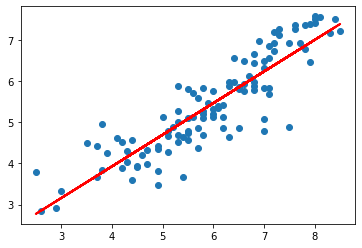

In [97]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red', linewidth=2)

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MSE: {:.3f}'.format(mean_squared_error(y, y_pred)))

MSE: 0.297
